# Analyse Approfondie des Autorisations d'Urbanisme à Paris
### Dans ce notebook, nous allons procéder à une analyse approfondie des autorisations d'urbanisme à Paris. Nous chercherons à identifier des motifs et des corrélations dans les données, ainsi qu'à interpréter les résultats. Une description du jeu de données est fournie selon OpenDataParis:
    Jeu de données géolocalisées exposant les autorisations d'urbanisme des 6 derniers mois
    
    La Direction de l'Urbanisme de la Ville de Paris instruit et délivre les autorisations d'urbanisme indispensables aux entreprises ou aux particuliers.
    
    Elle contrôle leur mise en œuvre et verbalise les travaux sans autorisation ou non conformes aux autorisations délivrées.
    
    Elle délivre aussi les autorisations relatives aux enseignes, à la publicité, aux étalages et aux terrasses.
    
    Elle recouvre les droits de voirie et taxes d'urbanisme
    
    Liste des autorisations d'urbanisme :
    
    permis de construire (PC), permis de démolir (PD), permis d'aménager (PA), déclarations préalables(DP), certificats d'urbanisme (CU) 

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display, Markdown
df = pd.read_csv('autorisations_durbanisme.csv', sep=";")


In [215]:

# Afficher les premières lignes du DataFrame
display(Markdown("### Premières lignes du jeu de données :"))
display(df.head())

# Obtenir la forme du jeu de données (lignes, colonnes)
display(Markdown("### Forme du jeu de données :"))
display(pd.DataFrame({"Forme du jeu de données": [df.shape]}, index=["(lignes, colonnes)"]))

# Obtenir les types de données de chaque colonne
display(Markdown("### Types de données de chaque colonne :"))
display(df.dtypes.to_frame().T.rename(index={0: 'Types de données'}))

# Obtenir des statistiques de base pour les colonnes numériques
display(Markdown("### Statistiques de base pour les colonnes numériques :"))
display(df.describe())

# Obtenir des statistiques de base pour les colonnes non numériques
display(Markdown("### Statistiques de base pour les colonnes non numériques :"))
display(df.describe(include=['object', 'category']))

# Vérifier les valeurs manquantes dans chaque colonne
display(Markdown("### Valeurs manquantes dans chaque colonne :"))
display(df.isnull().sum().to_frame().T)


### Premières lignes du jeu de données :

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d
0,DP 075 120 24 V0187,Déclarations préalables,MAIRE DE PARIS DEVE,20,Autorisé le 09/07/2024,34 RUE DURIS 75020 PARIS,Pose d'un container type maritime provisoireme...,Pose d'un container type maritime provisoireme...,2024-05-14,2024-07-09,Accordé,Favorable,EST,655116.128777,6.863067e+06,"{""coordinates"": [2.3881669551258873, 48.866071...","48.866071159161926, 2.3881669551258873"
1,DP 075 120 24 V0127,Déclarations préalables,Madame nadine dard,20,Autorisé le 16/04/2024,4 RUE LESPAGNOL 75020 PARIS,Changement de destination des locaux existant ...,Changement de destination des locaux existant ...,2024-03-28,2024-04-16,Accordé,Favorable,EST,655424.368122,6.862196e+06,"{""coordinates"": [2.3924599615846485, 48.858253...","48.85825346418242, 2.3924599615846485"
2,DP 075 120 23 V0536,Déclarations préalables,Monsieur Jérémie Souteyrat,20,Autorisé le 26/02/2024,4 CITE DE L'ERMITAGE 75020 PARIS,Travaux de ravalement d'une construction à R+...,Travaux de ravalement d'une construction à R+...,2023-12-26,2024-02-26,Accordé,FavorableRéservé,EST,655448.070825,6.863478e+06,"{""coordinates"": [2.392648627253466, 48.8697828...","48.86978285557991, 2.392648627253466"
3,DP 075 120 24 V0004,Déclarations préalables,TDF - DII,20,Autorisé le 13/02/2024,155 RUE PELLEPORT 75020 PARIS,Installation d'un relais de radiotéléphonie mo...,Installation d'un relais de radiotéléphonie mo...,2024-01-03,2024-02-13,Accordé,FavorableRéservé,EST,655817.498878,6.863959e+06,"{""coordinates"": [2.397634548466823, 48.8741395...","48.87413955245593, 2.397634548466823"
4,DP 075 120 24 V0112,Déclarations préalables,SCI Los Agrimensores Coronados,20,Autorisé le 14/05/2024,110 RUE DES COURONNES 75020 PARIS,"Modification d’aspect extérieur, Changement de...","Modification d’aspect extérieur, Changement de...",2024-03-17,2024-05-14,Accordé,Favorable,EST,655177.189993,6.863631e+06,"{""coordinates"": [2.3889397608795515, 48.871148...","48.87114887595239, 2.3889397608795515"


### Forme du jeu de données :

,Forme du jeu de données
"(lignes, colonnes)","(7583, 17)"


### Types de données de chaque colonne :

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d
Types de données,object,object,object,int64,object,object,object,object,object,object,object,object,object,float64,float64,object,object


### Statistiques de base pour les colonnes numériques :

,commune,x,y
count,7583.000000,7583.000000,7.583000e+03
mean,11.515363,635974.537716,6.698817e+06
std,5.467006,99488.164528,1.047592e+06
min,1.000000,0.000000,0.000000e+00
25%,7.000000,649615.610340,6.861047e+06
50%,12.000000,651559.000127,6.862669e+06
75%,16.000000,653214.883367,6.864103e+06
max,20.000000,660369.631661,6.867010e+06


### Statistiques de base pour les colonnes non numériques :

,nom_dossier,type_dossier,demandeur,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,geo_shape,geo_point_2d
count,7583,7583,7583,7583,7583,7579,7583,7583,5301,7583,5301,7583,7583,7583
unique,7583,4,5423,506,6730,4872,6329,457,189,3,4,4,6437,6437
top,PC 075 101 24 V0003,Déclarations préalables,Ville de Paris,Déposé le 22/07/2024,34 RUE LA PEROUSE 75016 PARIS,Modification d’aspect extérieur d'une construc...,Modification de devanture,2024-02-09,2024-06-05,Accordé,Favorable,NORD,"{""coordinates"": [-1.3630812101178986, -5.98385...","-5.983856309013353, -1.3630812101178986"
freq,1,6270,68,73,6,102,62,84,85,4338,2241,2072,181,181


### Valeurs manquantes dans chaque colonne :

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d
0,0,0,0,0,0,0,4,0,0,2282,0,2282,0,0,0,0,0


In [216]:
nb_en_cours = df[df['etat']== "En cours d'instruction"].shape[0]
display(Markdown(f'### Nombres de dossiers en cours: {nb_en_cours}, ça explique les valeurs manquantes en type_decision et date_decision'))

### Nombres de dossiers en cours: 2282, ça explique les valeurs manquantes en type_decision et date_decision

## Explication des Types de Décisions

Les types de décisions dans le contexte des dossiers administratifs peuvent inclure plusieurs catégories :

- **Favorable** : Cette décision indique que le dossier a été accepté et que les autorisations demandées ont été accordées sans conditions particulières.

- **Défavorable** : Ce type de décision signifie que le dossier a été rejeté et que les autorisations demandées n'ont pas été accordées.

- **FavorableRéservé** : Cette décision indique que le dossier est accepté sous réserve de certaines conditions spécifiques. Ces conditions doivent être remplies avant que la décision ne devienne définitive.

- **FavorableTacite** : Ce type de décision se réfère à une situation où la demande est considérée comme acceptée en l'absence de réponse explicite de l'administration dans un délai réglementaire. En d'autres termes, le silence de l'administration est interprété comme une approbation.
### Délai d'Autorisation et Prolongations

D'après les informations fournies par [Novlaw.fr](https://novlaw.fr), les délais d'autorisation pour les demandes sont les suivants :
```
    - 2 mois pour les demandes de permis de démolir et pour les demandes de permis de construire portant sur une maison individuelle.
    - 3 mois pour les autres demandes de permis de construire et pour les demandes de permis d’aménager.
```
Ces délais peuvent être prolongés dans certains cas, notamment lorsque le projet est situé dans le périmètre d’un site patrimonial remarquable ou dans les abords des monuments historiques.


Ces types de décisions reflètent la diversité des résultats possibles dans le traitement des dossiers administratifs et sont essentiels pour comprendre les processus décisionnels.



## Graphes d'explorations

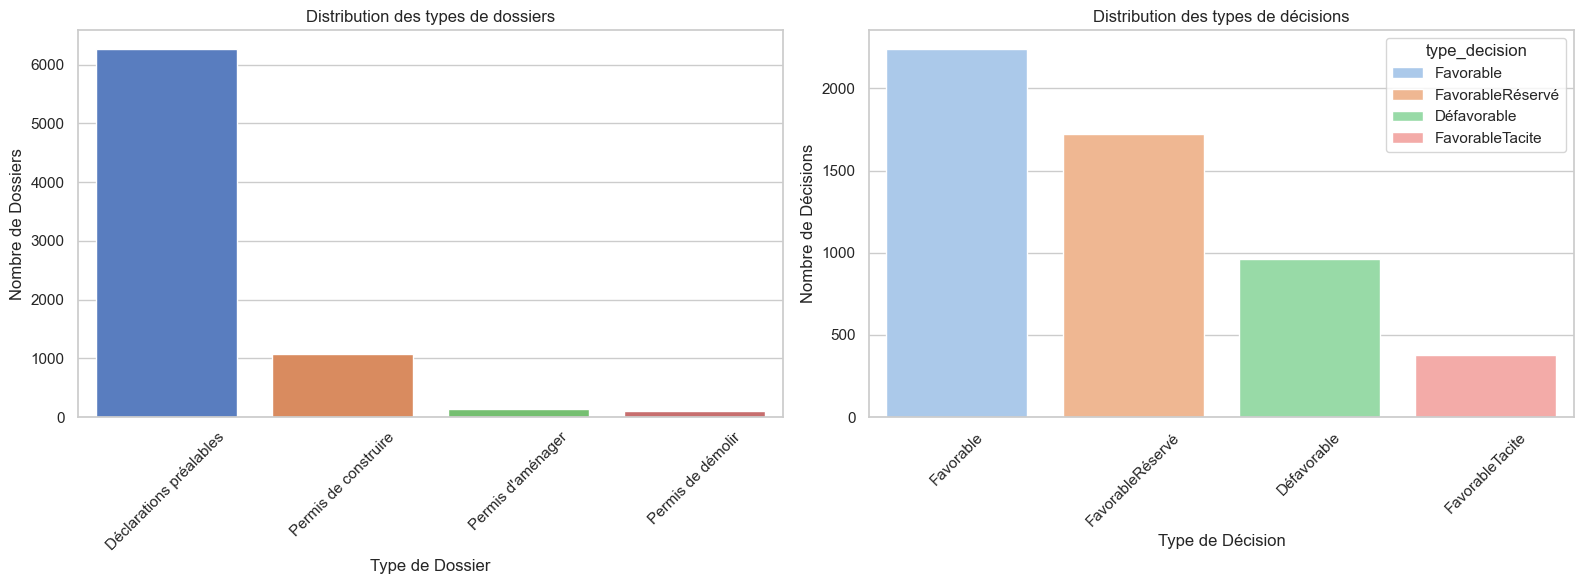

In [217]:
# Définir un style pour les graphiques
sns.set(style="whitegrid")

# Créer des sous-graphiques pour les deux graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Distribution de 'type_dossier'
sns.countplot(data=df, x='type_dossier', palette='muted', hue='type_dossier', ax=axes[0])
axes[0].set_title('Distribution des types de dossiers')
axes[0].set_xlabel('Type de Dossier')
axes[0].set_ylabel('Nombre de Dossiers')
axes[0].tick_params(axis='x', rotation=45)

# Distribution de 'type_decision'
sns.countplot(data=df, x='type_decision', palette='pastel',hue='type_decision', ax=axes[1])
axes[1].set_title('Distribution des types de décisions')
axes[1].set_xlabel('Type de Décision')
axes[1].set_ylabel('Nombre de Décisions')
axes[1].tick_params(axis='x', rotation=45)

# Ajuster les espacements
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [218]:
df['demandeur'] = df['demandeur'].apply(lambda x: x.lower())
display(df['demandeur'].value_counts())

demandeur
ville de paris                        120
rivp                                   66
paris habitat                          62
free mobile                            50
mairie de paris                        44
                                     ... 
enies                                   1
sas artkansas building contractor       1
sfodf                                   1
selarl pharmacie des petits champs      1
madame man chen                         1
Name: count, Length: 5270, dtype: int64

## Fonctions utils pour les statistiques

### 1. Chi square test

In [219]:
def chi_square_test(df, var1, var2):
    # Create a contingency table
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p_value, dof, expected


### 2. Cramer's V

In [220]:
def cramers_v(df, var1, var2):
    # Create a contingency table
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Perform chi-square test
    chi2, _, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.values.sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))

    return cramer_v


## 3. Fonction des Résidus Standardisés

In [221]:
from scipy.stats.contingency import margins

def standardized_residuals(df, var1, var2):
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df[var1], df[var2])

    # Calculer les fréquences attendues
    chi2, _, _, expected = chi2_contingency(contingency_table)

    # Calculer les résidus standardisés
    observed = contingency_table.values
    residuals = stdres(observed, expected)
    
    # Créer un DataFrame des résidus standardisés pour une meilleure visualisation
    residuals_df = pd.DataFrame(
        residuals, 
        index=contingency_table.index, 
        columns=contingency_table.columns
    )

    return residuals_df

def stdres(observed, expected):
    n = observed.sum()
    rsum, csum = margins(observed)
    rsum = rsum.astype(np.float64)
    csum = csum.astype(np.float64)
    v = csum * rsum * (n - rsum) * (n - csum) / n**3
    return (observed - expected) / np.sqrt(v)


# Analyse des types de dossiers

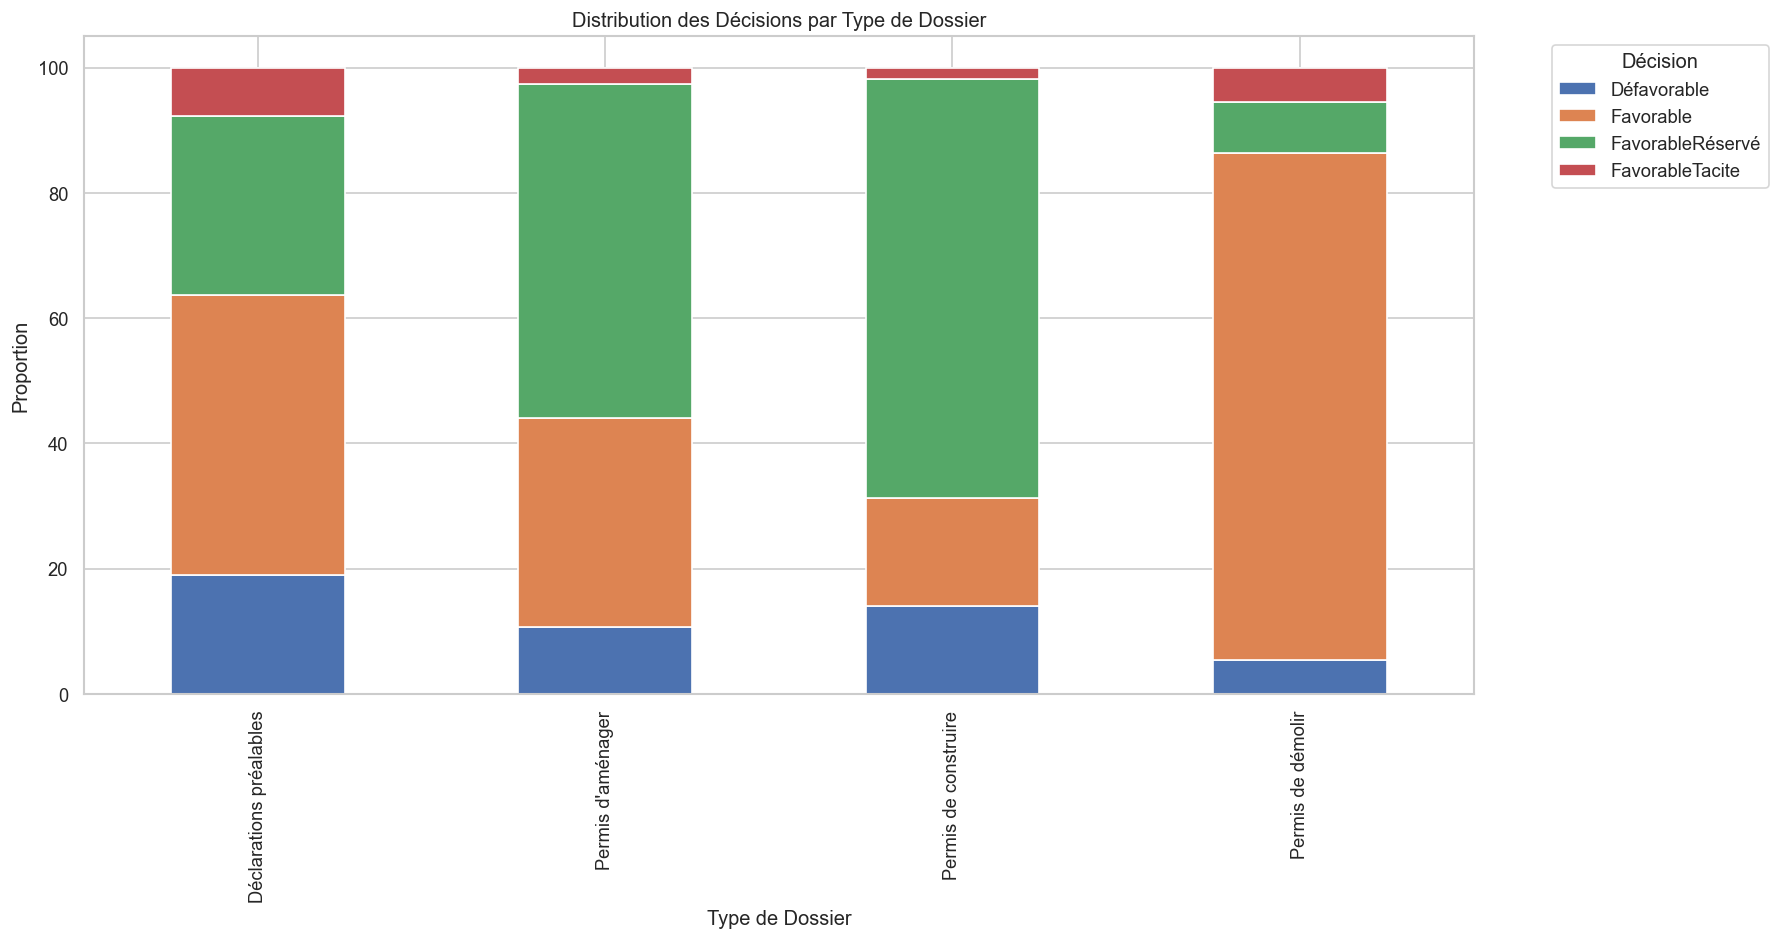

## Résultats du test du Chi-carré :

### valeur du chi-carré : 402.0816559584379

### p-value : 4.9262594610093895e-81

### V de cramer: 0.1590074967194348

In [222]:
# Créer une table de contingence
contingency_table = pd.crosstab(df['type_dossier'], df['type_decision'])

# Calculer les pourcentages
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
percentages = percentage_table
# Visualisation de la distribution des décisions par type de dossier
fig, ax = plt.subplots(figsize=(15, 8), dpi=120)
percentages.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution des Décisions par Type de Dossier')
ax.set_xlabel('Type de Dossier')
ax.set_ylabel('Proportion')
ax.legend(title='Décision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajuste le remplissage pour empêcher le chevauchement
plt.show()
# Test du Chi-deux et V de Cramer
chi2, p_value, dof, expected = chi_square_test(df, 'type_dossier', 'type_decision')
cramer = cramers_v(df, 'type_dossier', 'type_decision')  

# Print important data as markdown headers
display(Markdown(f"## Résultats du test du Chi-carré :"))
display(Markdown(f"### valeur du chi-carré : {chi2}"))
display(Markdown(f"### p-value : {p_value}"))
display(Markdown(f"### V de cramer: {cramer}"))




## Interprétation des résultats du test du Chi-carré

Les résultats du test du Chi-carré sont les suivants :

- **Valeur du chi-carré :** 402.08
- **p-value :** 4.93e-81
- **V de Cramer :** 0.16

### Interprétation

Les autorisations urbaines comprennent divers types de dossiers et de décisions. Le test du Chi-carré examine la relation entre ces deux variables.

1. **p-value très faible (4.93e-81)** : Cette valeur indique que la probabilité que la relation observée entre les types de dossiers et les types de décisions soit due au hasard est extrêmement faible. Par conséquent, nous rejetons l'hypothèse nulle, ce qui signifie qu'il existe une relation statistiquement significative entre le type de dossier et le type de décision.

2. **Valeur du chi-carré élevée (402.08)** : Une valeur élevée du chi-carré indique une forte association entre les variables. Cela suggère que les variations dans le type de dossier sont liées aux variations dans le type de décision.

3. **V de Cramer (0.16)** : Bien que la valeur de V de Cramer soit supérieure à 0, elle est relativement faible, indiquant une faible à modérée force de l'association entre les deux variables. Cela signifie que, bien qu'il y ait une relation statistiquement significative, la force de cette relation est limitée.

### Conclusion

Ces résultats suggèrent qu'il y a une dépendance significative entre le type de dossier soumis pour les autorisations urbaines et la décision prise. Cependant, la force de cette relation est faible à modérée. D'autres analyses pourraient être nécessaires pour explorer cette relation plus en détail et comprendre les facteurs spécifiques qui influencent la prise de décision.


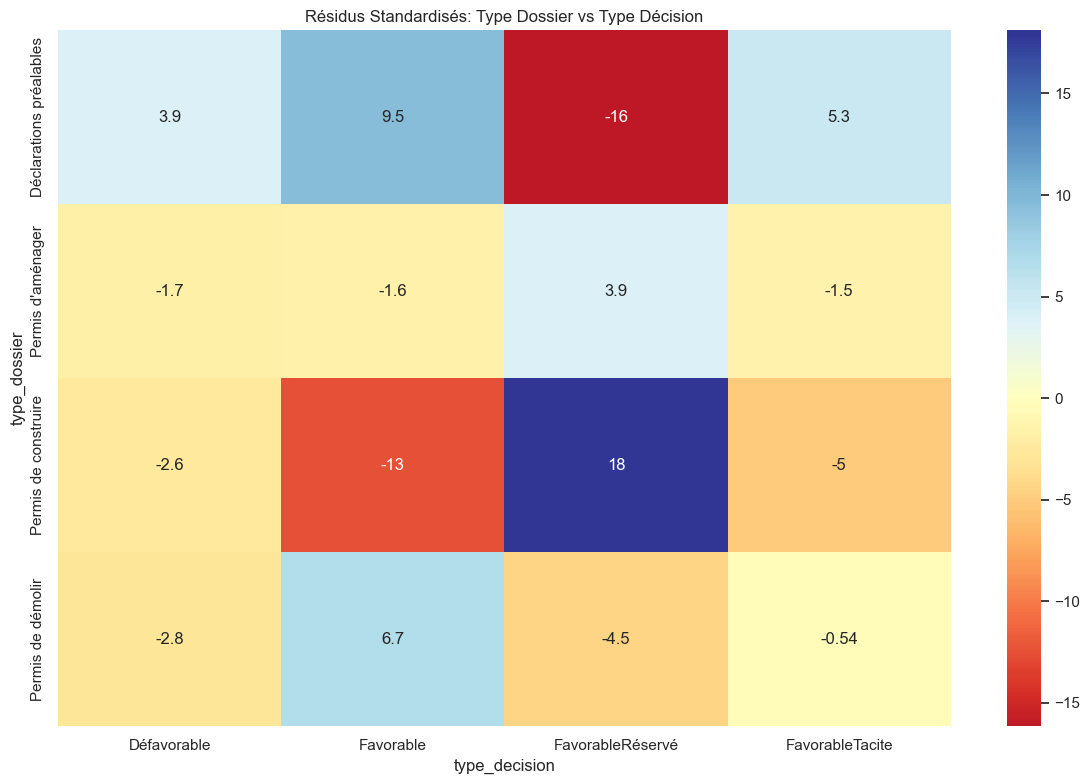

In [223]:
residuals_df = standardized_residuals(df,'type_dossier', 'type_decision')

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(residuals_df, annot=True, cmap='RdYlBu', center=0)
plt.title('Résidus Standardisés: Type Dossier vs Type Décision')
plt.tight_layout()
plt.show()

### Interprétation des Résidus Standardisés Principaux

#### 1. **Déclarations préalables**
- **FavorableRéservé** : Résidu standardisé de -16.13. Il y a beaucoup moins de décisions favorables avec réserve que prévu pour les déclarations préalables. Cela pourrait indiquer que les réserves ne sont pas souvent appliquées à ce type de dossier ou que les demandes ne nécessitent pas de conditions supplémentaires.

#### 2. **Permis de construire**
- **FavorableRéservé** : Résidu standardisé de 18.10. Il y a beaucoup plus de décisions favorables avec réserve que prévu. Cela peut être dû à des contraintes de construction en France, où des conditions supplémentaires sont souvent imposées pour les permis de construire.

#### 3. **Permis d'aménager**
- **FavorableRéservé** : Résidu standardisé de 3.88. Il y a plus de décisions favorables avec réserve que prévu. Les permis d'aménager peuvent nécessiter des conditions supplémentaires, ce qui explique ce résidu positif.

#### 4. **Permis de démolir**
- **Favorable** : Résidu standardisé de 6.71. Il y a beaucoup plus de décisions favorables que prévu pour les permis de démolir. Cela pourrait refléter une tendance à accorder plus facilement des permis de démolir par rapport à d'autres types de dossiers.

- **Défavorable** : Résidu standardisé de -2.83. Il y a moins de décisions défavorables que prévu pour les permis de démolir. Cela peut indiquer que les demandes de démolition sont généralement mieux accueillies par les autorités.

Ces résultats montrent des écarts importants dans les décisions en fonction du type de dossier, suggérant des pratiques ou des contraintes spécifiques qui influencent fortement la distribution des décisions.


# Analyse Temporelle

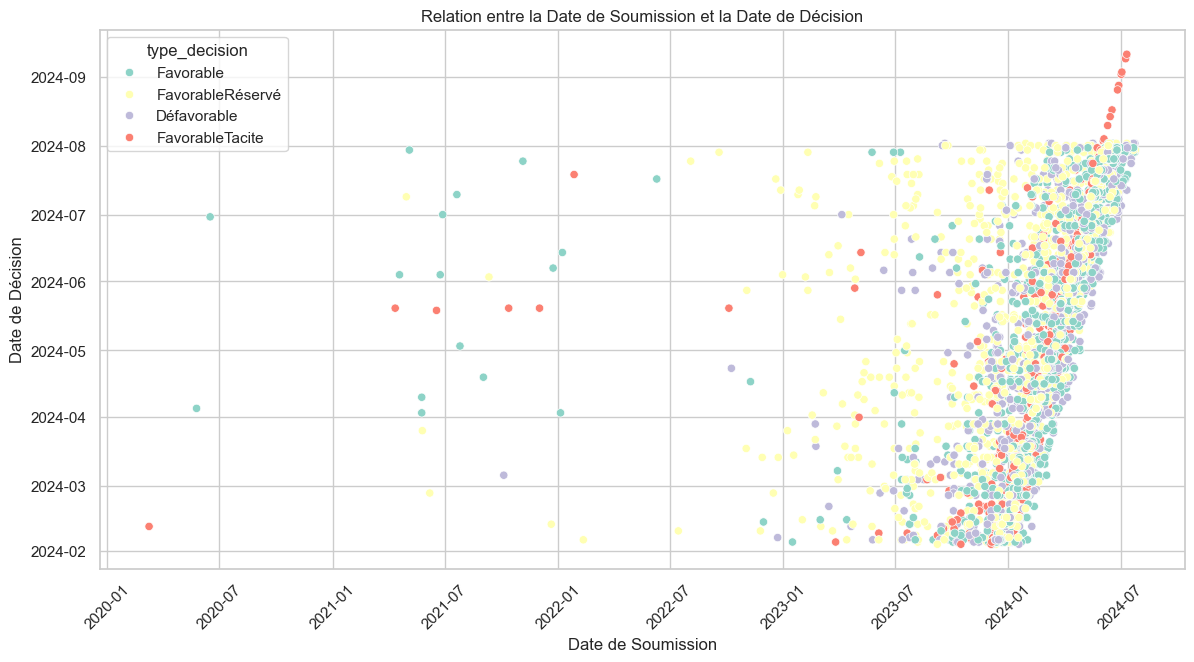

In [224]:
# Assurez-vous que les colonnes 'date_depot' et 'date_decision' sont au format datetime
df['date_depot'] = pd.to_datetime(df['date_depot'])
df['date_decision'] = pd.to_datetime(df['date_decision'])

# Visualiser la relation entre 'date_depot' et 'date_decision'
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='date_depot', y='date_decision', hue='type_decision', palette='Set3')
plt.title('Relation entre la Date de Soumission et la Date de Décision')
plt.xlabel('Date de Soumission')
plt.ylabel('Date de Décision')
plt.xticks(rotation=45)
plt.show()


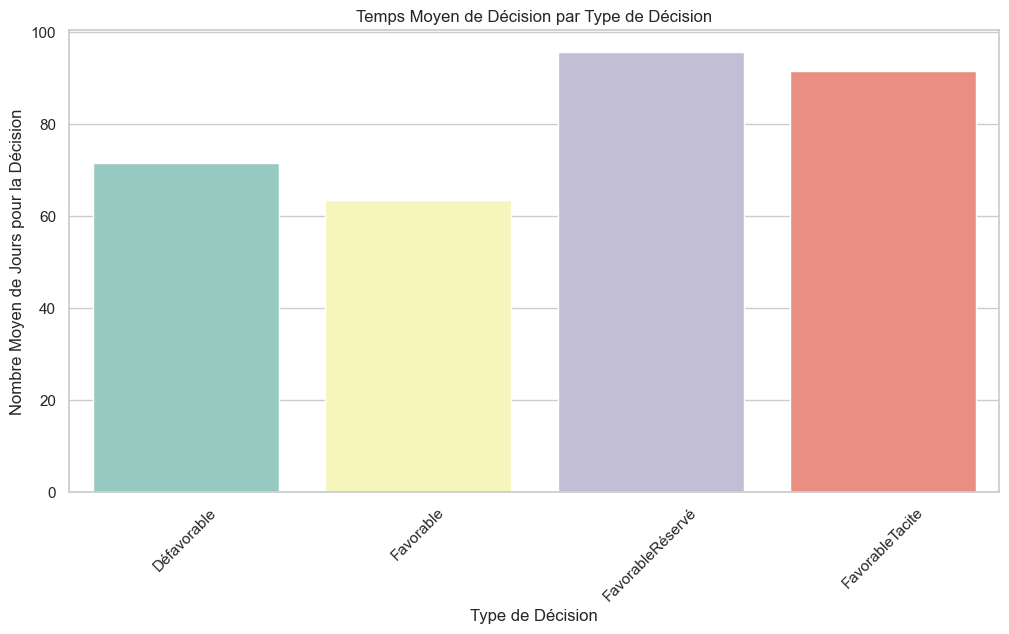

In [225]:
# Assurez-vous que la colonne 'decision_time' est déjà calculée
# Sinon, calculez la différence de temps entre 'date_depot' et 'date_decision'
df['decision_time'] = pd.to_datetime(df['date_decision']) - pd.to_datetime(df['date_depot'])
df['decision_time'] = df['decision_time'].dt.days

# Calculer le temps moyen de décision pour chaque type de décision
avg_decision_time = df.groupby('type_decision')['decision_time'].mean().reset_index()

# Visualiser le temps moyen de décision pour chaque type de décision
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_decision_time, x='type_decision', y='decision_time', hue='type_decision', palette='Set3')
plt.title('Temps Moyen de Décision par Type de Décision')
plt.xlabel('Type de Décision')
plt.ylabel('Nombre Moyen de Jours pour la Décision')
plt.xticks(rotation=45)
plt.show()




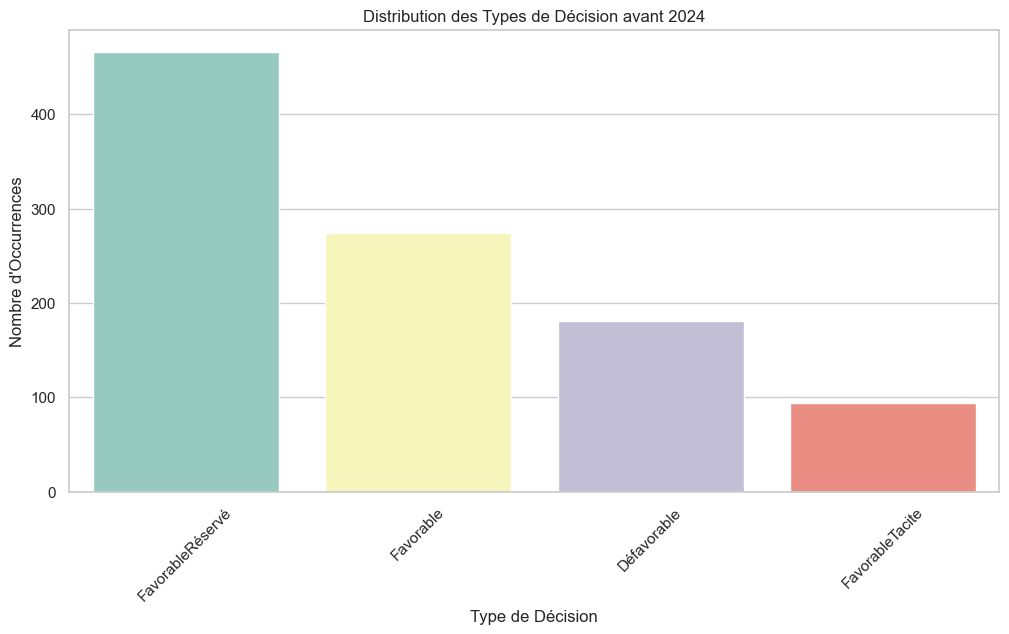

In [226]:
# Assurez-vous que 'date_depot' est au format datetime
df['date_depot'] = pd.to_datetime(df['date_depot'])

# Filtrer le DataFrame pour les lignes où 'date_depot' est avant 2024
filtered_df = df[df['date_depot'] < '2024-01-01']

# Compter les occurrences de chaque 'type_decision' dans le DataFrame filtré
decision_counts = filtered_df['type_decision'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=decision_counts.index, y=decision_counts.values,hue=decision_counts.index, palette='Set3')
plt.title('Distribution des Types de Décision avant 2024')
plt.xlabel('Type de Décision')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()


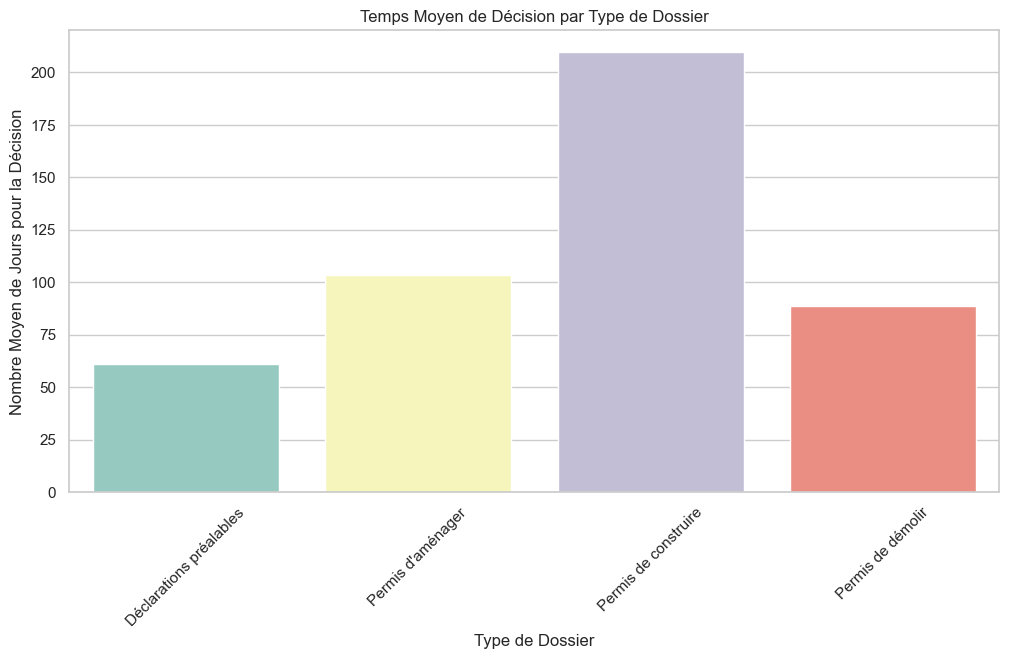

In [227]:
# Assurez-vous que la colonne 'decision_time' est déjà calculée
# Sinon, calculez la différence de temps entre 'date_depot' et 'date_decision'
df['decision_time'] = pd.to_datetime(df['date_decision']) - pd.to_datetime(df['date_depot'])
df['decision_time'] = df['decision_time'].dt.days

# Calculer le temps moyen de décision pour chaque type de dossier
avg_decision_time = df.groupby('type_dossier')['decision_time'].mean().reset_index()

# Visualiser le temps moyen de décision pour chaque type de dossier
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_decision_time, x='type_dossier', y='decision_time', hue='type_dossier', palette='Set3')
plt.title('Temps Moyen de Décision par Type de Dossier')
plt.xlabel('Type de Dossier')
plt.ylabel('Nombre Moyen de Jours pour la Décision')
plt.xticks(rotation=45)
plt.show()



In [228]:
from scipy import stats
df_clean = df.dropna(subset=['decision_time', 'type_dossier'])

f_statistic, p_value = stats.f_oneway(
    df_clean[df_clean['type_dossier'] == 'Déclarations préalables']['decision_time'],
    df_clean[df_clean['type_dossier'] == 'Permis d\'aménager']['decision_time'],
    df_clean[df_clean['type_dossier'] == 'Permis de construire']['decision_time'],
    df_clean[df_clean['type_dossier'] == 'Permis de démolir']['decision_time']
)

print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

F-statistic: 486.7551481651903
p-value: 2.3800597039228058e-279


In [229]:
from scipy import stats
df_clean = df.dropna(subset=['decision_time', 'type_decision'])
f_statistic, p_value = stats.f_oneway(
    df_clean[df_clean['type_decision'] == 'Favorable']['decision_time'],
    df_clean[df_clean['type_decision'] == 'Défavorable']['decision_time'],
    df_clean[df_clean['type_decision'] == 'FavorableRéservé']['decision_time'],
    df_clean[df_clean['type_decision'] == 'FavorableTacite']['decision_time']
)

print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

F-statistic: 40.163003496278755
p-value: 1.1760546353208653e-25


### Analyse du Temps de Décision par Type de Dossier et Type de Décision

#### Observations Principales :

1. **Temps de Décision pour les Types de Dossiers :**
   - Les dossiers de type "Déclarations préalables", "Permis d'aménager", "Permis de construire" et "Permis de démolir" montrent des variations significatives dans les temps de décision. Les dossiers de construction, en particulier, prennent plus de temps en raison de leur complexité.

2. **Temps de Décision pour les Types de Décisions :**
   - Les décisions de type "Favorable Réservé" et "Favorable Tacite" prennent plus de temps en moyenne. Cela est dû à des conditions supplémentaires ou à des vérifications plus approfondies.

#### Résultats de l'ANOVA :

1. **ANOVA pour le Type de Dossier :**
   - **Statistique F :** `486.755`
   - **Valeur p :** `2.380e-279`

   La valeur élevée de la statistique F indique une variance significative entre les temps de décision pour les différents types de dossiers. La valeur p extrêmement faible (inférieure à 0,05) confirme que les différences observées sont statistiquement significatives. Cela signifie que les temps de décision diffèrent de manière significative selon le type de dossier.

2. **ANOVA pour le Type de Décision :**
   - **Statistique F :** `40.163`
   - **Valeur p :** `1.176e-25`

   La statistique F élevée pour le type de décision indique également des différences significatives dans les temps de décision selon le type de décision. La valeur p très inférieure à 0,05 indique que ces différences sont statistiquement significatives. Les temps de décision varient considérablement en fonction du type de décision.

#### Conclusion :

Les résultats de l'ANOVA montrent que les variations des temps de décision sont statistiquement significatives tant pour les types de dossiers que pour les types de décisions. Les types de dossiers plus complexes, comme les permis de construire, et les décisions impliquant des conditions supplémentaires, comme "Favorable Réservé", prennent plus de temps pour être traitées. Ces résultats confirment les observations initiales et soulignent l'importance des types de dossiers et des types de décisions dans le temps de traitement des demandes.


# Analyse De Circonscriptions

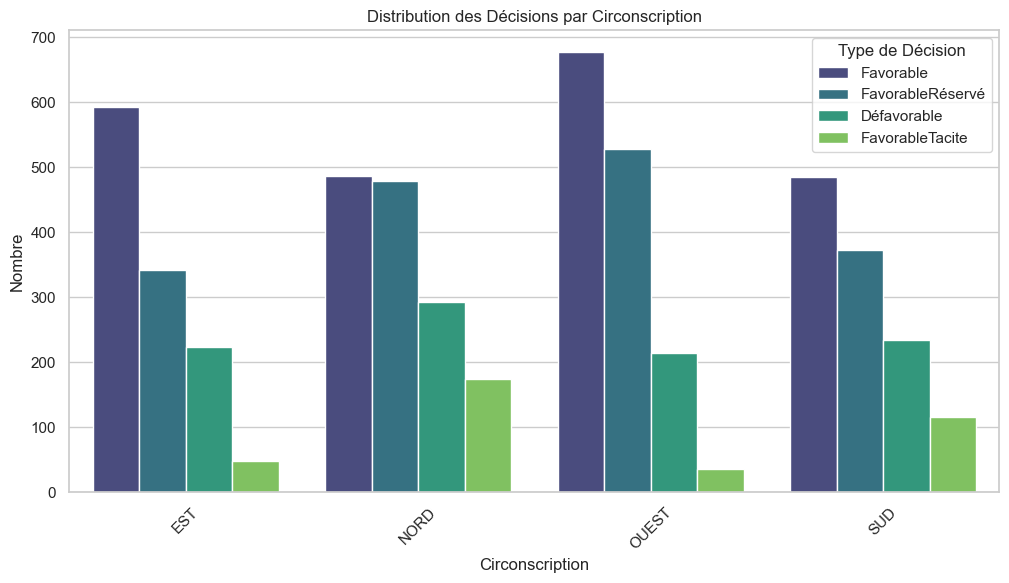

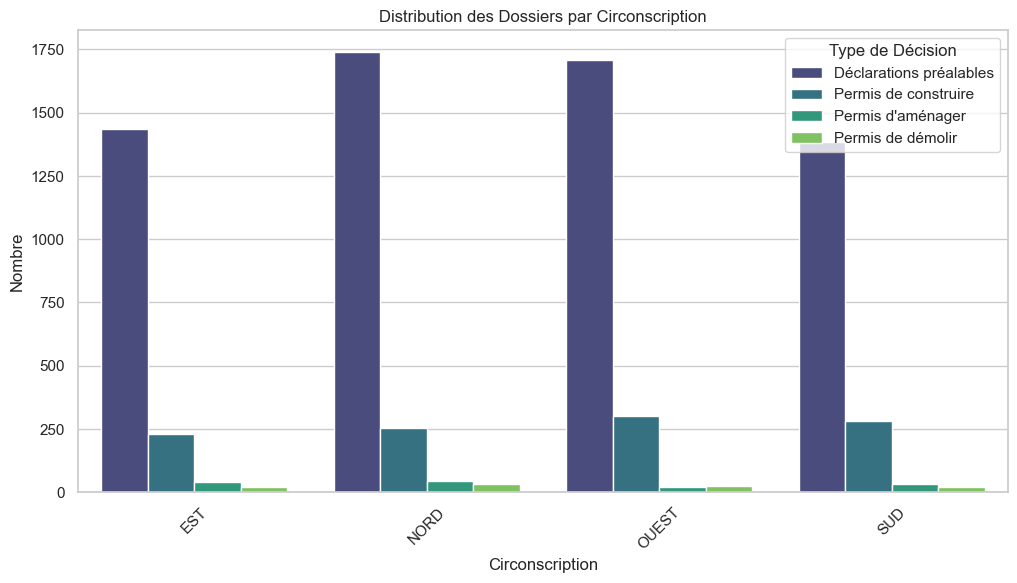

In [230]:

# Visualisation de la distribution des décisions par circonscription
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='circonscription', hue='type_decision', palette='viridis')
plt.title('Distribution des Décisions par Circonscription')
plt.xlabel('Circonscription')
plt.ylabel('Nombre')
plt.legend(title='Type de Décision')
plt.xticks(rotation=45)
plt.show()

# Visualisation de la distribution des dossiers par circonscription
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='circonscription', hue='type_dossier', palette='viridis')
plt.title('Distribution des Dossiers par Circonscription')
plt.xlabel('Circonscription')
plt.ylabel('Nombre')
plt.legend(title='Type de Décision')
plt.xticks(rotation=45)
plt.show()


In [231]:
# Test du Chi-deux et V de Cramer
chi2, p_value, dof, expected = chi_square_test(df, 'circonscription', 'type_decision')
cramer = cramers_v(df, 'circonscription', 'type_decision')  

# Print important data as markdown headers
display(Markdown(f"## Résultats du test du Chi-carré :"))
display(Markdown(f"### valeur du chi-carré : {chi2}"))
display(Markdown(f"### p-value : {p_value}"))
display(Markdown(f"### V de cramer: {cramer}"))

## Résultats du test du Chi-carré :

### valeur du chi-carré : 197.6909621715787

### p-value : 1.0096030839567333e-37

### V de cramer: 0.11149461137851122

## Interprétation des Résultats

### Test du Chi-carré

- **Valeur du chi-carré** : 197.69
- **p-value** : 1.01e-37
- **V de Cramer** : 0.11

### Analyse

Les résultats du test du Chi-carré montrent une valeur du chi-carré très élevée et une p-value extrêmement faible, indiquant une relation statistiquement significative entre les variables `circonscription` et `type_decision`. Le V de Cramer, égal à 0.11, indique une association faible à modérée entre les deux variables.

### Observations Spécifiques

En examinant les données, il est notable que la circonscription "nord" présente un modèle distinct par rapport aux autres circonscriptions :

- **Décisions favorable** : La circonscription "nord" montre une proportion relativement plus faible de décisions favorables comparée aux autres circonscriptions.
- **Décisions Favorable Tacite** : Cette circonscription affiche une proportion plus élevée de décisions favorables tacites par rapport aux autres zones.

Ces différences peuvent suggérer des variations locales dans les critères ou les processus de décision, potentiellement dues à des politiques spécifiques ou à des pratiques administratives propres à la circonscription "nord".


# Analyse des communes

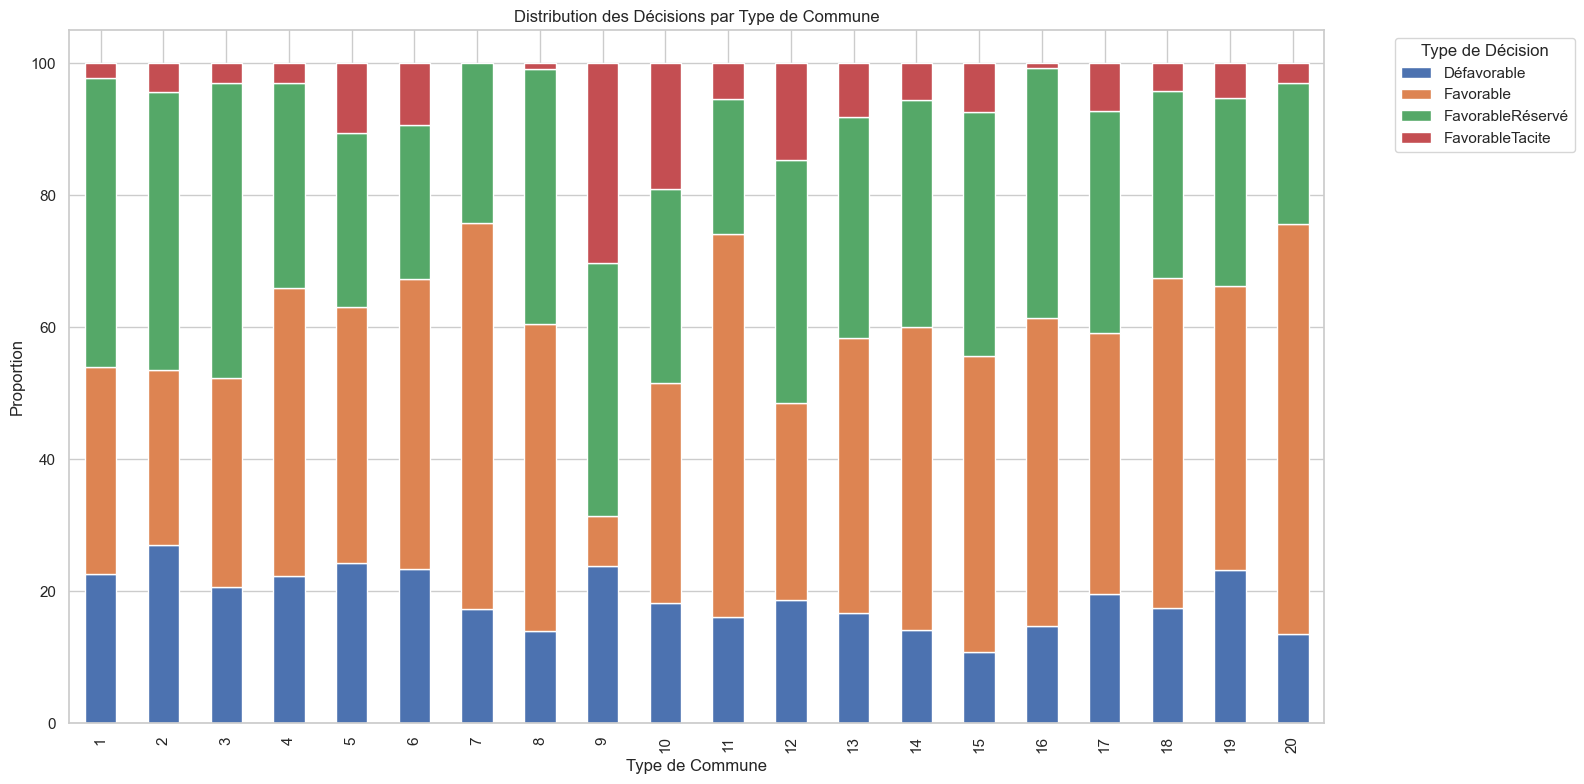

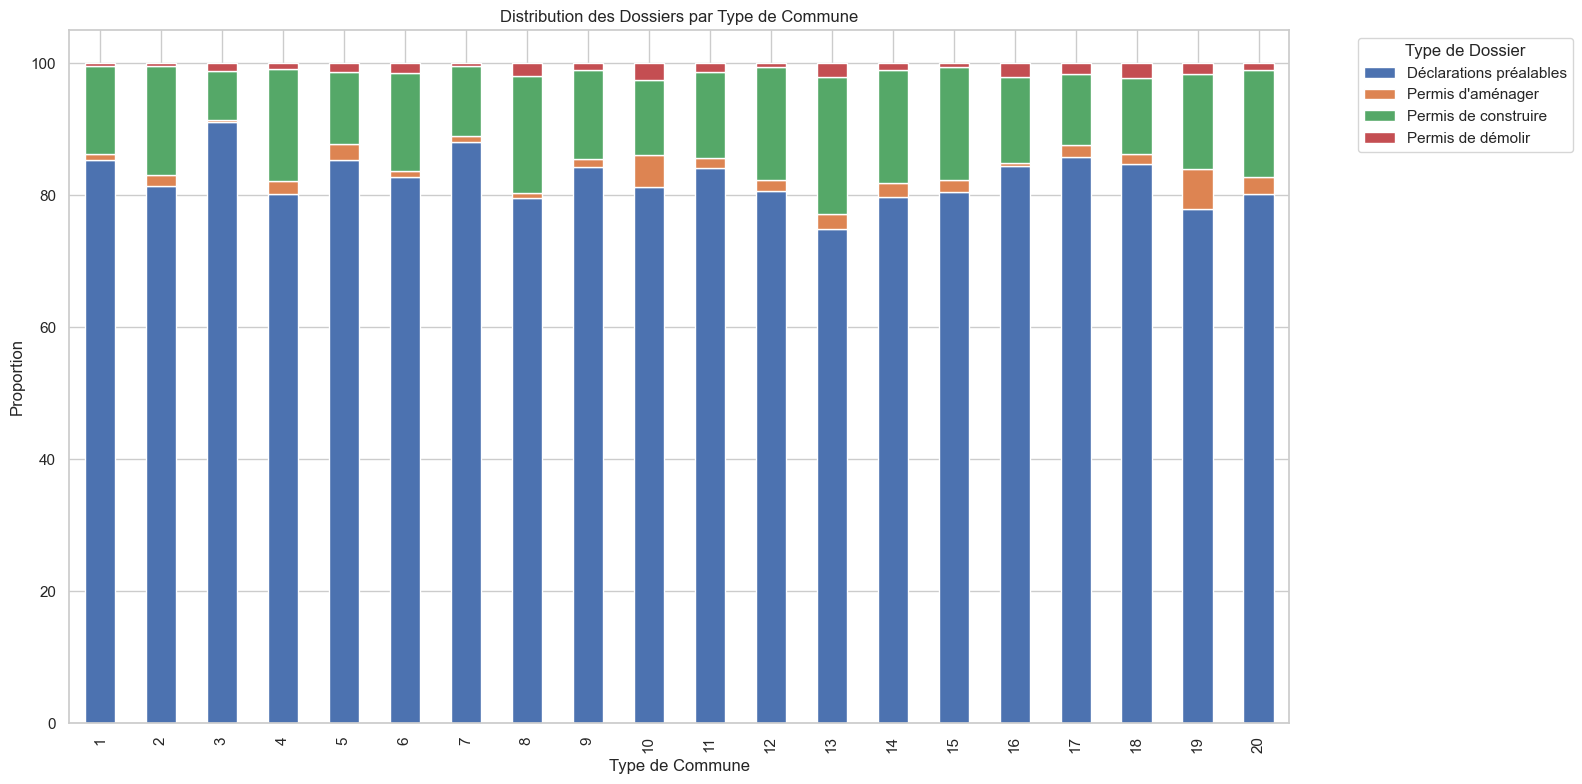

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Créer une table de contingence
contingency_table = pd.crosstab(df['commune'], df['type_decision'])
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
percentages = percentage_table

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(16, 8))

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, ax=ax)

# Personnaliser le graphique
ax.set_title('Distribution des Décisions par Type de Commune')
ax.set_xlabel('Type de Commune')
ax.set_ylabel('Proportion')
ax.legend(title='Type de Décision', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

# Créer une table de contingence
contingency_table = pd.crosstab(df['commune'], df['type_dossier'])
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
percentages = percentage_table

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(16, 8))

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, ax=ax)

# Personnaliser le graphique
ax.set_title('Distribution des Dossiers par Type de Commune')
ax.set_xlabel('Type de Commune')
ax.set_ylabel('Proportion')
ax.legend(title='Type de Dossier', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


## Analyse des Décisions par Type de Commune

### Distribution des Décisions par Commune

La visualisation montre que les différents types de décisions varient considérablement entre les communes. On observe des différences notables dans les proportions de décisions favorables, défavorables, favorables réservées et favorables tacites. Ces variations peuvent refléter des politiques locales spécifiques ou des caractéristiques propres à chaque commune. 

Certaines communes, par exemple, affichent des modèles distincts dans les types de décisions, ce qui peut indiquer des pratiques administratives ou des critères de décision particuliers à ces communes.


In [233]:
# Test du Chi-deux et V de Cramer
chi2, p_value, dof, expected = chi_square_test(df, 'commune', 'type_decision')
cramer = cramers_v(df, 'commune', 'type_decision')  

# Print important data as markdown headers
display(Markdown(f"## Tests d'indépendence: Commune et Type decision"))
display(Markdown(f"## Résultats du test du Chi-carré :"))
display(Markdown(f"### valeur du chi-carré : {chi2}"))
display(Markdown(f"### p-value : {p_value}"))
display(Markdown(f"### V de cramer: {cramer}"))

## Tests d'indépendence: Commune et Type decision

## Résultats du test du Chi-carré :

### valeur du chi-carré : 661.3930357744175

### p-value : 8.78203259456816e-104

### V de cramer: 0.20393430132371793

In [234]:
# Test du Chi-deux et V de Cramer
chi2, p_value, dof, expected = chi_square_test(df, 'commune', 'type_dossier')
cramer = cramers_v(df, 'commune', 'type_dossier')  

# Print important data as markdown headers
display(Markdown(f"## Tests d'indépendence: Commune et Type dossier"))
display(Markdown(f"## Résultats du test du Chi-carré :"))
display(Markdown(f"### valeur du chi-carré : {chi2}"))
display(Markdown(f"### p-value : {p_value}"))
display(Markdown(f"### V de cramer: {cramer}"))

## Tests d'indépendence: Commune et Type dossier

## Résultats du test du Chi-carré :

### valeur du chi-carré : 152.40635293351014

### p-value : 1.2322937825687842e-10

### V de cramer: 0.08185031967644281


### Interprétation :
Les résultats du test du Chi-carré montrent une valeur élevée du chi-carré (661.39) et une p-value très faible (8.78e-104), indiquant une association significative entre les communes et les types de décisions. Le V de Cramer, qui est de 0.20, suggère une association modérée.
Pour les type dossiers, les tests ainsi que la visualisaion indiquent une relation trés faible entre la commune et les types de dossiers.

Cela signifie qu'il existe des différences notables dans la répartition des types de décisions entre les différentes communes. Ces variations peuvent refléter des pratiques administratives spécifiques ou des politiques locales propres à chaque commune. Les communes ne suivent pas un modèle uniforme pour les types de décisions, ce qui indique une certaine diversité dans la gestion des demandes entre les zones géographiques.


## On remarque aussi des grandes differences dans quelques communes comme la commune '9', faisons plus d'analyse pour cette commune

In [235]:
df[(df['commune'] == 9) & (~df['type_decision'].isna())].head(10)

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d,decision_time
4742,DP 075 109 24 V0245,Déclarations préalables,ldn company,9,Autorisé le 26/07/2024,5 RUE NOTRE-DAME DE LORETTE 75009 PARIS,"Modification de devanture, rentoilage du store","Modification de devanture, rentoilage du store",2024-05-31,2024-07-26,Accordé,FavorableRéservé,NORD,651487.298561,6.864313e+06,"{""coordinates"": [2.338560702695716, 48.8770073...","48.8770073779226, 2.338560702695716",56.0
4747,PD 075 109 24 V0001,Permis de démolir,afer immo,9,Autorisé le 31/05/2024,54 RUE LAFFITTE 75009 PARIS,"Démolition partielle de Plancher, Toiture, Esc...","Démolition partielle de Plancher, Toiture, Esc...",2024-01-15,2024-05-31,Accordé,Favorable,NORD,651508.158010,6.864157e+06,"{""coordinates"": [2.3388629096918385, 48.875605...","48.875605048292385, 2.3388629096918385",137.0
4748,DP 075 109 24 V0086,Déclarations préalables,12 budapest,9,Refusé le 12/03/2024,12 RUE DE BUDAPEST 75009 PARIS,Changement de destination des locaux existant ...,Changement de destination des locaux existant ...,2024-02-23,2024-03-12,Refusé,Défavorable,NORD,650683.827471,6.864266e+06,"{""coordinates"": [2.3276118351435877, 48.876526...","48.87652694841956, 2.3276118351435877",18.0
4751,PC 075 109 24 V0012,Permis de construire,sci dumas et snc ecp caumartin,9,Autorisé le 19/06/2024,109 RUE SAINT LAZARE 75009 PARIS,Passage du Havre. Création de trois réserves c...,Passage du Havre. Création de trois réserves c...,2024-02-26,2024-06-19,Accordé,FavorableRéservé,NORD,650641.900265,6.864113e+06,"{""coordinates"": [2.3270580384921518, 48.875143...","48.87514364062014, 2.3270580384921518",114.0
4752,DP 075 109 24 V0001,Déclarations préalables,pascal lepissier architecte,9,Autorisé le 01/03/2024,56 RUE DE DOUAI 75009 PARIS,ravalement des façades de la courette,ravalement des façades de la courette,2024-01-02,2024-03-01,Accordé,FavorableTacite,NORD,650872.456016,6.865045e+06,"{""coordinates"": [2.3300933589523503, 48.883550...","48.88355018181501, 2.3300933589523503",59.0
4753,DP 075 109 24 V0141,Déclarations préalables,duclair couverture,9,Autorisé le 02/06/2024,8 BOULEVARD POISSONNIERE 75009 PARIS,Réfection de la terrasse plomb R+5,Réfection de la terrasse plomb R+5,2024-04-02,2024-06-02,Accordé,FavorableTacite,NORD,652110.575433,6.863648e+06,"{""coordinates"": [2.347133204517018, 48.8710767...","48.87107679244352, 2.347133204517018",61.0
4754,DP 075 109 24 V0113,Déclarations préalables,livin paris,9,Refusé le 15/05/2024,31 RUE CHATEAUDUN 75009 PARIS,Changement de destination d’un local commercia...,Changement de destination d’un local commercia...,2024-03-15,2024-05-15,Refusé,Défavorable,NORD,651364.839263,6.864197e+06,"{""coordinates"": [2.3369043401148457, 48.875959...","48.875959642818394, 2.3369043401148457",61.0
4758,DP 075 109 23 V0091,Déclarations préalables,monsieur ambroise mouline,9,Refusé le 29/03/2024,37 RUE DE LA CHAUSSEE D'ANTIN 75009 PARIS,Remplacement de trois fenêtres de toit sur rue...,Remplacement de trois fenêtres de toit sur rue...,2023-02-22,2024-03-29,Refusé,Défavorable,NORD,651023.739262,6.864061e+06,"{""coordinates"": [2.33226964534611, 48.87471161...","48.87471161720662, 2.33226964534611",401.0
4760,DP 075 109 24 V0055,Déclarations préalables,ville de paris - deve,9,Autorisé le 09/04/2024,RUE NOTRE DAME DE LORETTE 75009 PARIS,Travaux sur le domaine public : abattage de tr...,Travaux sur le domaine public : abattage de tr...,2024-02-09,2024-04-09,Accordé,FavorableTacite,NORD,651371.975415,6.864497e+06,"{""coordinates"": [2.336967310646354, 48.8786559...","48.87865593046276, 2.336967310646354",60.0
4761,DP 075 109 24 V0120,Déclarations préalables,tdf-dii,9,Autorisé le 27/06/2024,15 RUE DE TREVISE 75009 PARIS,Modification d'un relais de radio téléphonie m...,Modification d'un relais de radio téléphonie m...,2024-03-18,2024-06-27,Accordé,FavorableTacite,NORD,651955.62

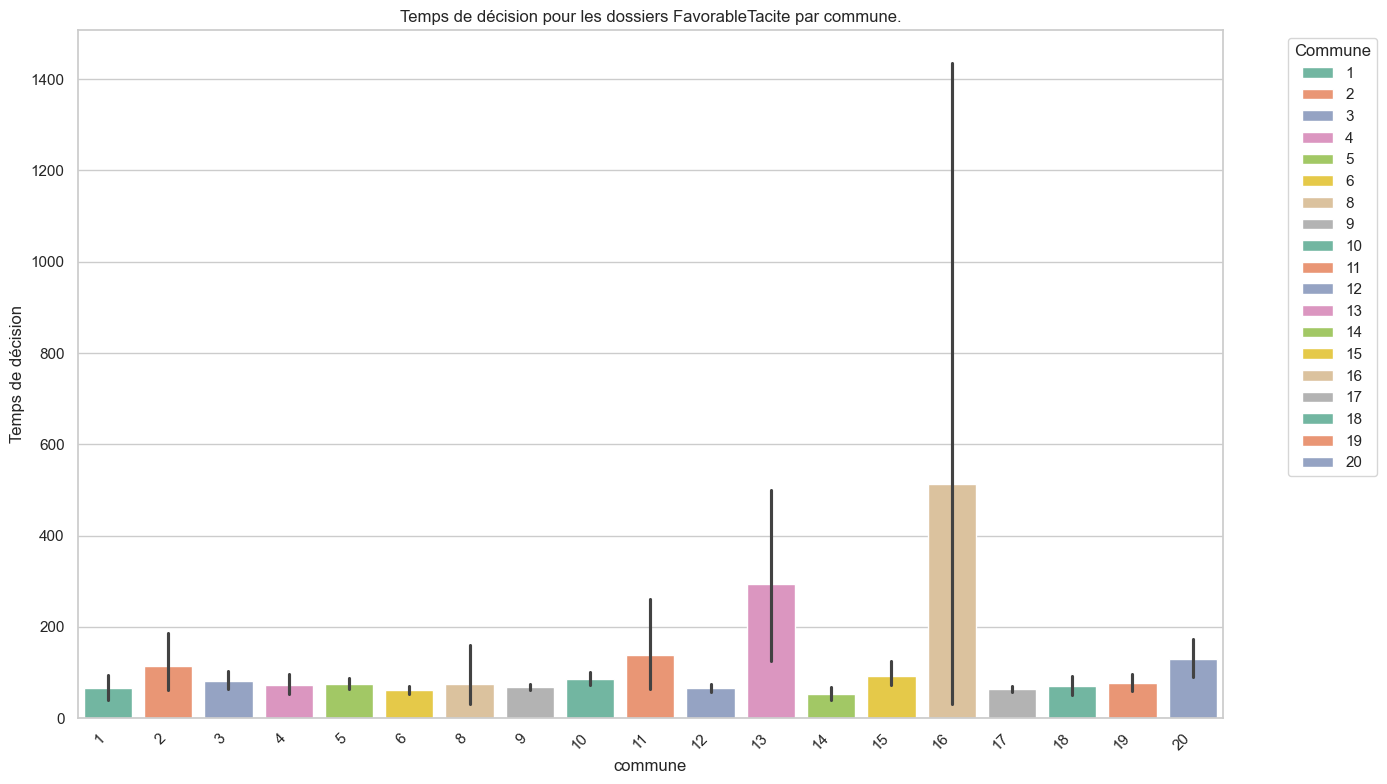

In [236]:
data = df[df['type_decision'] == 'FavorableTacite']
plt.figure(figsize=(14, 8))
sns.barplot(data=data, x='commune', y='decision_time', hue='commune', palette='Set2')
plt.title('Temps de décision pour les dossiers FavorableTacite par commune.')
plt.xlabel('commune')
plt.ylabel('Temps de décision')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Interprétations des Résultats pour la Commune 9

la **Commune 9** à Paris présente un nombre plus élevé que la normale de décisions **"Favorable Tacite"**, avec un temps de décision moyen de **60 jours**, plusieurs interprétations peuvent être tirées :

### 1. **Retards administratifs ou surcharge de travail**
- **Interprétation** : Un grand nombre de décisions "Favorable Tacite" indique que l'organisme administratif chargé du traitement des demandes pourrait connaître des retards ou être surchargé. Lorsque les demandes ne sont pas examinées dans les délais légaux définis, elles sont automatiquement considérées comme approuvées.
- **Raisonnement** : Cela peut être dû à divers facteurs tels qu'un manque de personnel, un volume élevé de demandes, ou un processus bureaucratique particulièrement complexe dans la Commune 9.

### 2. **Complexité des demandes**
- **Interprétation** : Les demandes soumises dans la Commune 9 peuvent être plus complexes ou nécessiter un examen plus approfondi par rapport à d'autres communes.
- **Raisonnement** : Des demandes complexes pourraient nécessiter un temps supplémentaire pour l'examen et la prise de décision, ce qui pourrait entraîner le dépassement des délais et l'approbation tacite.

### 3. **Soumission stratégique par les demandeurs**
- **Interprétation** : Les demandeurs pourraient soumettre stratégiquement leurs demandes pour exploiter le mécanisme d'approbation tacite.
- **Raisonnement** : Si les demandeurs anticipent que leur demande ne sera pas examinée à temps, ils pourraient compter sur le processus d'approbation tacite pour accélérer leurs projets, surtout s'ils pensent que leurs demandes seraient soumises à un examen rigoureux si elles étaient examinées en profondeur.

### 4. **Environnement juridique et réglementaire**
- **Interprétation** : L'environnement juridique et réglementaire dans la Commune 9 pourrait être particulièrement strict ou comporter de nombreuses exigences, ce qui allonge les délais de traitement.
- **Raisonnement** : Des contrôles et des équilibres réglementaires étendus pourraient prolonger le processus de prise de décision, entraînant plus de demandes bénéficiant d'une approbation tacite.

### 5. **Temps de décision moyen de 60 jours**
- **Interprétation** : Un temps de décision moyen de 60 jours, associé à un nombre élevé d'approbations tacites, suggère que le délai fixé pour l'examen et la décision des demandes pourrait ne pas être suffisant.
- **Raisonnement** : Cela pourrait impliquer que les processus et les ressources actuels ne sont pas adéquats pour répondre à la demande dans les délais fixés, soulignant la nécessité d'une optimisation des processus ou d'une allocation de ressources.

### **Recommandations Potentielles**
Sur la base de ces interprétations, plusieurs recommandations pourraient être faites pour résoudre la situation dans la Commune 9 :

1. **Augmenter les ressources** : Allouer davantage de ressources, comme du personnel ou des outils technologiques, à l'organisme administratif pour gérer le volume des demandes plus efficacement.
  
2. **Optimisation des processus** : Examiner et rationaliser les procédures de traitement des demandes pour réduire la complexité et le temps de traitement.
  
3. **Révision réglementaire** : Évaluer le cadre réglementaire pour identifier les goulots d'étranglement ou les complexités inutiles qui pourraient contribuer aux retards.
  
4. **Orientation des demandeurs** : Fournir des conseils et un soutien aux demandeurs pour s'assurer que leurs demandes sont complètes et conformes, ce qui pourrait réduire la nécessité d'un examen approfondi.
  
5. **Suivi et évaluation** : Mettre en place un système de suivi des délais de traitement et des résultats des demandes pour identifier les domaines à améliorer et s'assurer que les approbations tacites sont accordées de manière appropriée.

En s'attaquant à ces domaines, la Commune 9 pourrait améliorer l'efficacité du traitement des demandes et réduire la dépendance aux approbations tacites, garantissant que les décisions sont prises de manière explicite et dans les délais prévus.


### Nous observons également un délai maximal de 1400 jours pour un dossier de type « favorable tacite » dans la commune 16. Examinons cela de plus près

In [237]:
df[(df['decision_time'] >= 1400)]


,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d,decision_time
1860,DP 075 116 20 V0131,Déclarations préalables,sarl emet,16,Autorisé le 12/02/2024,10 RUE MIGNET 75016 PARIS,Ravalement de la façade sur rue avec mise en p...,le ravalement de la façade sur rue avec mise e...,2020-03-09,2024-02-12,Accordé,FavorableTacite,OUEST,646328.430229,6.861226e+06,"{""coordinates"": [2.268616494443761, 48.8488399...","48.84883991385244, 2.268616494443761",1435.0
3009,DP 075 114 20 V0223,Déclarations préalables,sb 14,14,Autorisé le 30/06/2024,3 RUE DE L' EURE 75014 PARIS,Surélévation d'un bâtiment R+2.\r\nSurface cré...,Surélévation d'un bâtiment R+2.\r\nSurface cré...,2020-06-16,2024-06-30,Accordé,Favorable,SUD,650240.818931,6.859358e+06,"{""coordinates"": [2.322146435779518, 48.8323588...","48.83235887366701, 2.322146435779518",1475.0
5260,DP 075 108 20 V0179,Déclarations préalables,sas mahler,8,Autorisé le 05/04/2024,11 RUE SAINT FLORENTIN 75008 PARIS,Rénovation partielle d'un immeuble mixte de bu...,Rénovation partielle d'un immeuble mixte de bu...,2020-05-25,2024-04-05,Accordé,Favorable,OUEST,650402.066804,6.863262e+06,"{""coordinates"": [2.323887656349582, 48.8674748...","48.86747485830538, 2.323887656349582",1411.0


### Arrondissement 16 : Temps de traitement plus longs pour les décisions tacites

L'arrondissement 16 de Paris est connu pour abriter de nombreux monuments historiques et des bâtiments de grande valeur architecturale. En raison de la présence de ces sites historiques, les demandes de permis nécessitent souvent des examens plus approfondis et un contrôle rigoureux des autorités compétentes pour s'assurer que les modifications proposées respectent les normes de préservation du patrimoine. Cela peut entraîner des **temps de traitement plus longs pour les décisions tacites**, car les autorités doivent prendre en compte l'impact des projets sur l'environnement historique et architectural.

### Observation sur la commune 8

En observant les données, nous remarquons que dans la commune 8, un projet de **surélévation** a pris un temps considérablement long à être traité. La surélévation, qui implique l'ajout de niveaux supplémentaires à un bâtiment existant, peut être un processus complexe. Les raisons du délai prolongé peuvent être multiples, y compris les contraintes structurelles, les évaluations architecturales nécessaires, et les approbations réglementaires requises pour de tels projets.

### Statistiques sur les dossiers contenant des surélévations

Dans l'ensemble du jeu de données, les dossiers qui contiennent le terme *surélévation* dans leur objet représentent une part significative des projets complexes. Voici quelques statistiques sur ces dossiers :



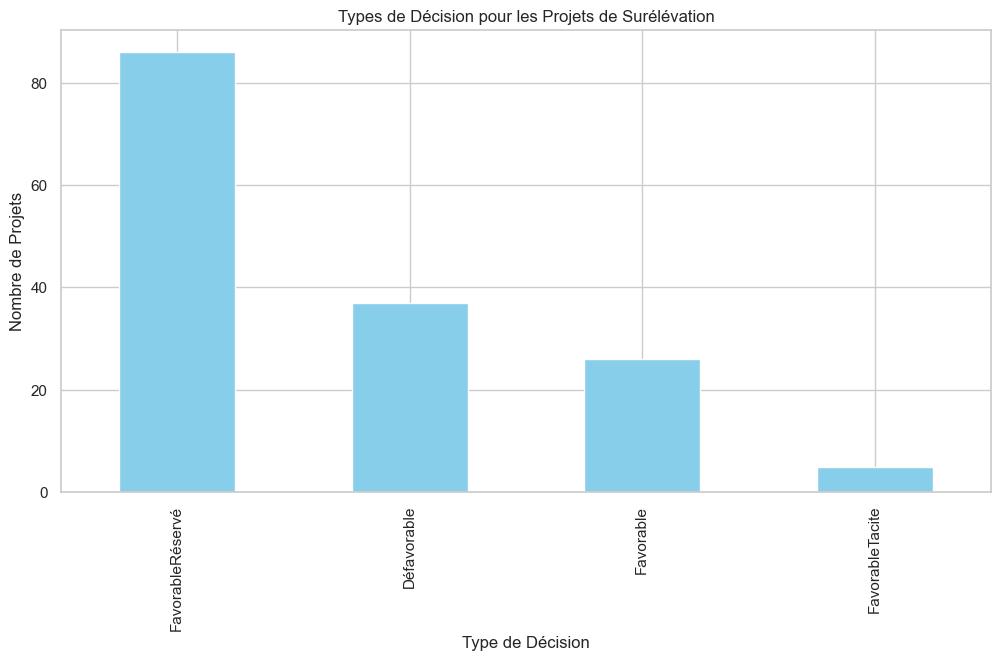

In [238]:
# Filtrer les projets de surélévation
surelevation_df = df[df['objet'].apply(lambda x: 'surélévation' in str(x).lower())]

# Compter les types de décision pour ces projets
surelevation_decisions = surelevation_df['type_decision'].value_counts()

# Visualisation des types de décision pour les projets de surélévation
plt.figure(figsize=(12, 6))
surelevation_decisions.plot(kind='bar', color='skyblue')
plt.title('Types de Décision pour les Projets de Surélévation')
plt.xlabel('Type de Décision')
plt.ylabel('Nombre de Projets')
plt.show()


## Types de Décision pour les Projets de Surélévation

Voici la répartition des types de décision pour les projets de surélévation :

- **Favorable avec Réserves** : 86
- **Défavorable** : 37
- **Favorable** : 26
- **Favorable Tacite** : 5

La majorité des projets de surélévation sont classés comme **Favorable avec Réserves**, ce qui indique que, bien que généralement acceptés, ces projets requièrent souvent des conditions ou des modifications spécifiques avant d'être approuvés définitivement. Le nombre significatif de projets **Défavorable** montre également que de nombreux projets de surélévation rencontrent des obstacles importants ou ne répondent pas aux critères requis.

Les projets **Favorable** sont moins nombreux, et le faible nombre de décisions **Favorable Tacite** suggère que peu de projets ont été approuvés par défaut sans réponse explicite des autorités.

Cette visualisation permet de mieux comprendre les défis et les conditions spécifiques auxquels les projets de surélévation sont confrontés lors du processus d'approbation.


# Analyse des demandeurs

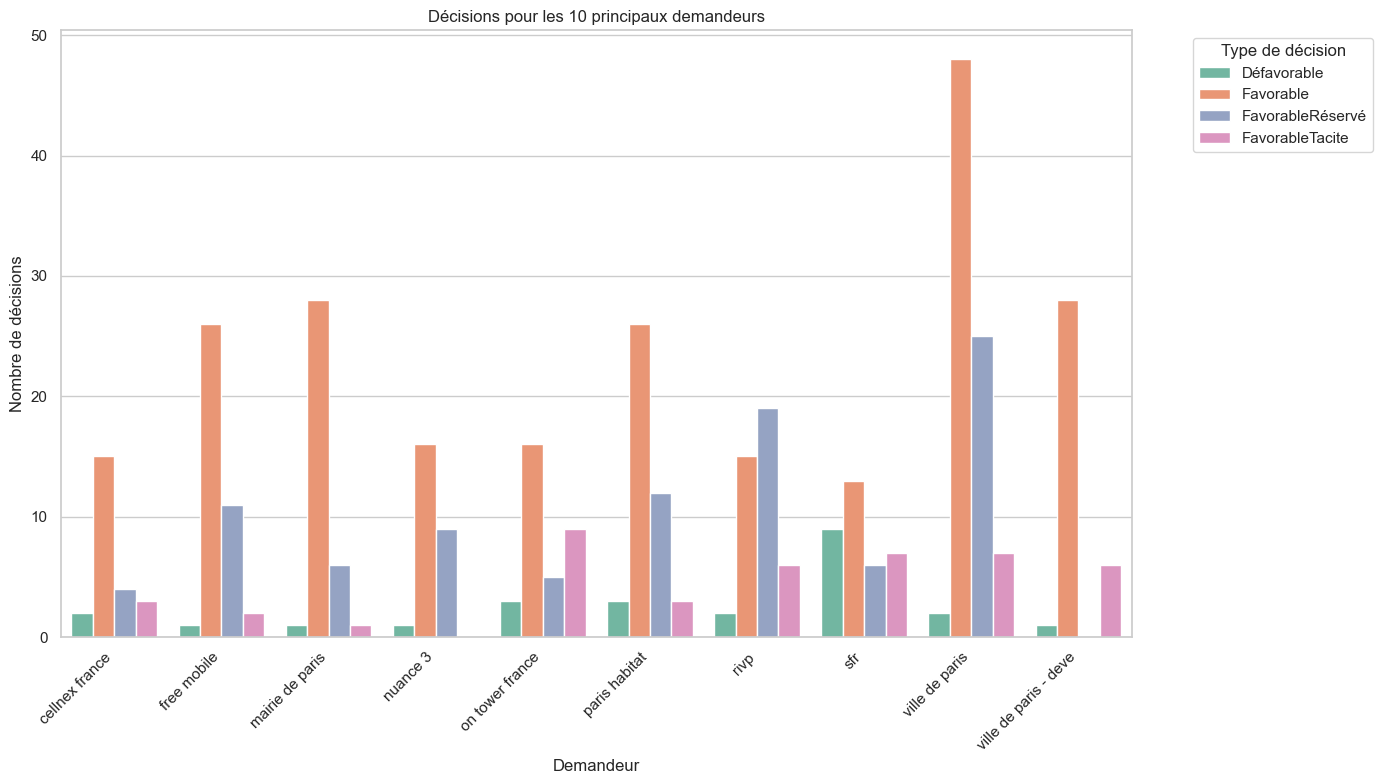

In [239]:
# Obtenir les 10 principaux demandeurs par nombre
demandeur_counts = df['demandeur'].value_counts()
top_10_demandeurs = demandeur_counts.head(10).index
top_10_data = df[df['demandeur'].isin(top_10_demandeurs)]
decision_counts = top_10_data.groupby(['demandeur', 'type_decision']).size().reset_index(name='count')
decision_pivot = decision_counts.pivot(index='demandeur', columns='type_decision', values='count').fillna(0)
plt.figure(figsize=(14, 8))
sns.barplot(data=decision_counts, x='demandeur', y='count', hue='type_decision', palette='Set2')
plt.title('Décisions pour les 10 principaux demandeurs')
plt.xlabel('Demandeur')
plt.ylabel('Nombre de décisions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type de décision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Interprétation des décisions pour les 10 principaux demandeurs
Les bureaux gouvernementaux, tels que VILLE DE PARIS, VILLE DE PARIS - DEVE, et Ville de Paris, ont tendance à recevoir des décisions plus favorables par rapport aux autres demandeurs. Cela peut indiquer que les projets soumis par les institutions publiques sont généralement mieux acceptés, reflétant une priorité accordée aux initiatives et projets gouvernementaux.



In [240]:
df[(df['demandeur'] == 'SFR') & (df['type_decision'] == 'Défavorable')]

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d,decision_time


il est intéressant de noter que **SFR** a reçu un nombre relativement élevé de décisions défavorables. Bien que les dossiers examinés ne présentent pas de caractéristiques particulièrement suspicieuses ou problématiques, il est possible que les projets proposés par SFR ne répondent pas toujours aux critères ou aux attentes des autorités réglementaires. Cela peut être dû à des facteurs tels que la complexité des projets, des questions d'urbanisme ou des préoccupations liées à l'impact sur l'environnement ou la communauté.

De plus, certaines de ces demandes ont été modifiées et soumises à nouveau, ce qui suggère un processus itératif pour obtenir l'approbation. Un grand nombre de ces dossiers ont pour sujet la **"Modification d’aspect extérieur d'une construction"**, ce qui peut impliquer des restrictions architecturales plus strictes ou des normes esthétiques dans les zones concernées, contribuant ainsi à la fréquence plus élevée de décisions défavorables.

In [241]:
df[(df['demandeur'] == 'RIVP') & (df['type_decision'] == 'FavorableRéservé')]

,nom_dossier,type_dossier,demandeur,commune,libelle,adresse,objet,programme,date_depot,date_decision,etat,type_decision,circonscription,x,y,geo_shape,geo_point_2d,decision_time


Pour **RIVP**, le grand nombre de dossiers **favorable réservé** est compréhensible, car elle présente beaucoup de dossiers de permis de construction.


# Analyse des dossiers dupliqués (resoumis)


In [242]:
# Identifier les dossiers dupliqués
dossiers_dupliqués = df.groupby(['demandeur', 'adresse', 'objet']).filter(lambda x: len(x) > 1)
# Inspection des dossiers dupliqués
print(len(dossiers_dupliqués))


132


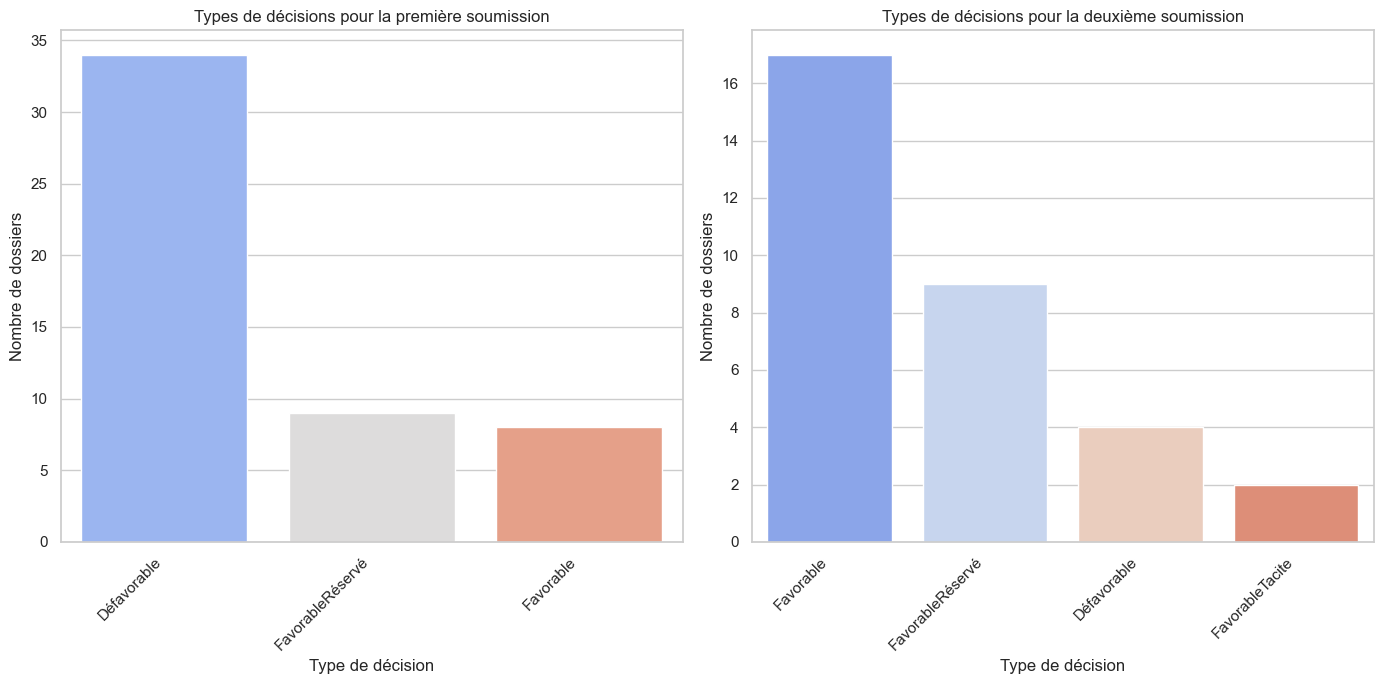

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les dossiers dupliqués par demandeur, adresse, objet, et date_depot
sorted_folders = dossiers_dupliqués.sort_values(by=['date_depot'])

# Ajouter un rang à chaque dossier au sein du groupe
sorted_folders['submission_rank'] = sorted_folders.groupby(['demandeur', 'adresse', 'objet']).cumcount() + 1
# Filtrer pour obtenir la première et la deuxième soumission
first_submissions = sorted_folders[sorted_folders['submission_rank'] == 1]
second_submissions = sorted_folders[sorted_folders['submission_rank'] == 2]

# Compter le nombre de chaque type de décision dans la première soumission
first_submission_decisions = first_submissions['type_decision'].value_counts().reset_index()
first_submission_decisions.columns = ['type_decision', 'count']

# Compter le nombre de chaque type de décision dans la deuxième soumission
second_submission_decisions = second_submissions['type_decision'].value_counts().reset_index()
second_submission_decisions.columns = ['type_decision', 'count']

# Tracer les graphiques pour la première et la deuxième soumission côte à côte
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(data=first_submission_decisions, x='type_decision', y='count', hue='type_decision', palette='coolwarm')
plt.title('Types de décisions pour la première soumission')
plt.xlabel('Type de décision')
plt.ylabel('Nombre de dossiers')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=second_submission_decisions, x='type_decision', y='count', hue='type_decision', palette='coolwarm')
plt.title('Types de décisions pour la deuxième soumission')
plt.xlabel('Type de décision')
plt.ylabel('Nombre de dossiers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Interprétation des Décisions pour les Soumissions Initiales et Répétées

### Première Soumission

Pour les dossiers soumis pour la première fois, nous observons la répartition suivante des types de décision :
- **Défavorable** : 33 dossiers
- **FavorableRéservé** : 8 dossiers
- **Favorable** : 7 dossiers

### Deuxième Soumission

Pour les dossiers soumis une deuxième fois, les décisions se répartissent comme suit :
- **Favorable** : 14 dossiers
- **FavorableRéservé** : 10 dossiers
- **Défavorable** : 3 dossiers
- **FavorableTacite** : 2 dossiers

### Analyse

Il est intéressant de noter que les dossiers soumis une deuxième fois montrent une répartition différente des décisions par rapport aux premières soumissions. Les dossiers de type **Défavorable** diminuent significativement dans les deuxièmes soumissions, tandis que les dossiers **Favorable** augmentent. Cette tendance pourrait indiquer que les dossiers initialement rejetés ont été révisés et améliorés lors de la deuxième soumission, ce qui a conduit à une augmentation des décisions favorables et des décisions **FavorableRéservé**. 


En résumé, la révision des dossiers semble avoir un impact positif sur les résultats des décisions, avec une tendance vers des décisions plus favorables lors des secondes soumissions.


# Conclusion Générale

L'analyse approfondie des dossiers d'urbanisme a permis de mettre en évidence plusieurs tendances clés :

1. **Influence des Types de Dossiers** : Les différents types de dossiers ont un impact modéré sur le type de décision rendu, avec un V de Cramer de 0.15 indiquant une relation faible à modérée. Cependant, ils influencent de manière plus significative les délais de décision. En particulier, les dossiers de construction, notamment ceux avec des demandes de **"Favorable Réservé"**, prennent généralement plus de temps à traiter.

2. **Impact des Demandeurs** : Les demandeurs gouvernementaux, comme ceux des grandes institutions publiques, tendent à obtenir plus souvent des décisions favorables. Cette tendance est liée à la nature des projets qu'ils présentent et à leur rôle dans le cadre réglementaire.

3. **Ré-Examens et Décisions** : Les dossiers qui sont soumis à nouveau obtiennent généralement des décisions plus favorables lors de la seconde soumission. Cette amélioration pourrait être due à des ajustements ou à des clarifications apportées lors du premier examen.

4. **Problématiques Spécifiques aux Types de Projets** : Les dossiers concernant des projets de **"Surélévation"** présentent une distribution plus variée des types de décisions, avec une tendance notable vers des décisions **"Favorable Réservé"** ou **"Défavorable"**. Cela pourrait refléter les complexités spécifiques associées à ces projets.

5. **Analyse Temporelle et Commune** : La relation entre la commune et le type de décision montre un V de Cramer de 0.2, indiquant une association plus forte que celle entre type dossier et décision. Les délais de décision varient également considérablement en fonction des communes et des types de projets. Les délais les plus longs sont souvent associés à des demandes complexes ou situées dans des zones protégées.

6. **Prochaines Étapes** : Pour améliorer encore la compréhension des délais et des décisions, il est recommandé d'explorer plus en profondeur les facteurs spécifiques influençant ces résultats. Cela inclut une analyse détaillée des dossiers en fonction des types d'objets, des caractéristiques des demandeurs, et des spécificités des communes. En outre, une évaluation des processus administratifs et des éventuels goulots d'étranglement pourrait offrir des pistes pour optimiser le traitement des dossiers et réduire les délais.

En somme, cette analyse met en lumière les variations dans les décisions et les délais en fonction des types de dossiers, des demandeurs, et des communes, fournissant des bases solides pour des améliorations potentielles dans le processus de gestion des demandes d'urbanisme.
